# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\Users\Lucy\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lucy\AppData\Roaming\Python\Python36\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
# Added round() to convert the [num_test/2] value to integer. 
test_data, test_labels = newsgroups_test.data[round(num_test/2):], newsgroups_test.target[round(num_test)/2:]
dev_data, dev_labels = newsgroups_test.data[:round(num_test/2)], newsgroups_test.target[:round(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


C:\Users\Lucy\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    
    # Iterate through first x rows, determined by num_examples input
    for i in range(0,num_examples):
        print('\n Text: ', train_data[i])
        
        # Get actual label name from newsgroups_train.target_names
        print('\n Label: ', newsgroups_train.target_names[train_labels[i]])

### STUDENT END ###
P1(5)


 Text:  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

 Label:  comp.graphics

 Text:  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 Label:  talk.reli

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2():
### STUDENT START ###

    # Initialize a CountVectorizer object and fit_transform to train data
    cv = CountVectorizer(train_data)
    vocab = cv.fit_transform(train_data)

    ## PART A
    print('PART A')
    # Print shape of vocab
    print('Size of vocabulary: ', vocab.shape[1])

    # Get count of non-zero features per example (row) and print the average
    nnz_vocab = [vocab[i].nnz for i in range(0,vocab.shape[0])]
    print('Avg number of non-zero features per example: ', round(np.average(nnz_vocab)))

    # Print fraction of non-zero values in vocab
    print('Fraction of non-zero values: ', vocab.nnz/(vocab.shape[0]*vocab.shape[1]))

    ## PART B
    print('\nPART B')
    # Print first and last elements of the list of feature names
    print('First feature string: ', cv.get_feature_names()[0])
    print('Last feature string: ', cv.get_feature_names()[vocab.shape[1]-1])

    ## PART C
    print('\nPART C')
    # Initialize another CountVectorizer object and print shape of feature vectors
    cv2 = CountVectorizer(train_data, vocabulary=["atheism", "graphics", "space", "religion"])
    vocab2 = cv2.fit_transform(train_data)
    print('Shape of specified feature vectors: ', vocab2.shape)

    # Get count of non-zero features per example (row) and print the average
    nnz_vocab2 = [vocab2[i].nnz for i in range(0,vocab2.shape[0])]
    print('Avg number of non-zero features per example: ', round(np.average(nnz_vocab2)))

    ## PART D
    print('\nPART D')
    # Initialize another CountVectorizer object, specifiy bigram/trigram char feautres and print shape
    cv3 = CountVectorizer(train_data, analyzer='char', ngram_range=(2,3))
    vocab3 = cv3.fit_transform(train_data)
    print('Size of vocabulary: ', vocab3.shape[1])

    ## PART E
    print('\nPART E')
    # Initialize another CountVectorizer object, specifiy cutoff of 10 words
    cv4 = CountVectorizer(train_data, min_df=10)
    vocab4 = cv4.fit_transform(train_data)
    print('Size of vocabulary: ', vocab4.shape[1])

    ## PART F
    print('\nPART F')
    # Fit the dev data
    cv_dev = CountVectorizer(dev_data)
    vocab_dev = cv_dev.fit_transform(dev_data)

    # Compare features names in dev to those in train and get the fraction of words in dev that do not appear in train
    # Create array that returns TRUE if dev feature also appears in train
    dev_in_vocab = np.in1d(cv_dev.get_feature_names(), cv.get_feature_names())
    # Subtract count of TRUE elements in dev_in_vocab from total length of vocab_dev, then divide by 
    # total length of vocab_dev to get fraction
    print('Fraction of dev vocab that does not appear: ', (len(cv_dev.get_feature_names())-sum(dev_in_vocab))/len(cv_dev.get_feature_names()))

### STUDENT END ###
P2()

PART A
Size of vocabulary:  26879
Avg number of non-zero features per example:  97.0
Fraction of non-zero values:  0.0035978272269590263

PART B
First feature string:  00
Last feature string:  zyxel

PART C
Shape of specified feature vectors:  (2034, 4)
Avg number of non-zero features per example:  0.0

PART D
Size of vocabulary:  35478

PART E
Size of vocabulary:  3064

PART F
Fraction of dev vocab that does not appear:  0.247876400345


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [5]:
def P3():
### STUDENT START ###

    #Re-define vocabulary for train and dev set, since P2 is a function and does not preserve the values...
    # Initialize a CountVectorizer object and fit_transform to train data, then also transform dev data
    cv = CountVectorizer(train_data)
    vocab = cv.fit_transform(train_data)
    vocab_dev = cv.transform(dev_data)

    ## K NEAREST NEIGHBORS MODEL
    # Create initial KNN model to test other k values against
    best_k = 1
    KNN_model = KNeighborsClassifier(best_k)
    KNN_model.fit(vocab, train_labels)
    KNN_score = metrics.f1_score(dev_labels, KNN_model.predict(vocab_dev), average='macro')

    # Now iterate through other values of k and see if the F1 score improves
    for k in [3, 5, 7, 9]:

        #Initialize and fit the classifier to training set
        KNN_model_test = KNeighborsClassifier(k)

        # Fit the model and test the F1 score. If the score is higher than the previous value of k, replace the 
        # Final model with the current value of k. Otherwise, continue loop
        KNN_model_test.fit(vocab, train_labels)
        KNN_score_test = metrics.f1_score(dev_labels, KNN_model_test.predict(vocab_dev), average='macro')
        if KNN_score_test > KNN_score:
            KNN_model = KNN_model_test
            KNN_score = KNN_score_test
            best_k = k

    print('Best k-value is ', best_k, ' and yields f1 score of ', KNN_score)

    ## MULTINOMIAL NAIVE BAYES MODEL
    # Create initial MNB model to test other alphas against
    best_alpha=1.0
    MNB_model = MultinomialNB()
    MNB_model.fit(vocab, train_labels)
    MNB_score = metrics.f1_score(dev_labels, MNB_model.predict(vocab_dev), average='macro')

    # Now iterate through other values of alpha and see if the F1 score improves
    for a in [0.00000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 2.0, 10.0]:

        #Create the MultnomialNB classifier, using a as the alpha parameter
        MNB_model_test = MultinomialNB(alpha=a)

        # Fit the model and test the F1 score. If the score is higher than the previous value of alpha, replace the 
        # Final model with the current value of alpha. Otherwise, continue loop
        MNB_model_test.fit(vocab, train_labels)
        MNB_score_test = metrics.f1_score(dev_labels, MNB_model_test.predict(vocab_dev), average='macro')
        if MNB_score_test > MNB_score:
            MNB_model = MNB_model_test
            MNB_score = MNB_score_test
            best_alpha = a

    print('Best alpha is ', best_alpha, ' and yields f1 score of ', MNB_score)

    ## LOGISTIC REGRESSION MODEL
    # Create initial Logistic Regression model to test other C values against
    best_C = 1.0
    Log_model = LogisticRegression(C=best_C)
    Log_model.fit(vocab, train_labels)
    Log_score = metrics.f1_score(dev_labels, Log_model.predict(vocab_dev), average='macro')

    # Now iterate through other values of k and see if the F1 score improves
    for c_val in [0.1, 0.5, 1.0, 10, 50, 1000]:

        #Initialize and fit the classifier to training set
        Log_model_test = LogisticRegression(C=c_val)

        # Fit the model and test the F1 score. If the score is higher than the previous value of k, replace the 
        # Final model with the current value of k. Otherwise, continue loop
        Log_model_test.fit(vocab, train_labels)
        Log_score_test = metrics.f1_score(dev_labels, Log_model_test.predict(vocab_dev), average='macro')
        if Log_score_test > Log_score:
            Log_model = Log_model_test
            Log_score = Log_score_test
            best_C = c_val

        ## PART C OF ANSWER SECTION
        # Get log weights by class and feature
        log_weights = Log_model_test.coef_
        # Square every element, then sum all the elements in each row
        total_weights = np.sum(np.square(log_weights), axis=1)
        print('For a C value of ', c_val, ' the sum of the squared weight values for each class is ', total_weights)

    print('Best C is ', best_C, ' and yields f1 score of ', Log_score)

### STUDENT END ###
P3()

Best k-value is  7  and yields f1 score of  0.437093013011
Best alpha is  0.1  and yields f1 score of  0.772512556016
For a C value of  0.1  the sum of the squared weight values for each class is  [ 27.12813676  24.65407469  27.45918101  23.0251669 ]
For a C value of  0.5  the sum of the squared weight values for each class is  [ 102.62253251   83.08129994   99.03903659   88.97528396]
For a C value of  1.0  the sum of the squared weight values for each class is  [ 167.12352246  130.86532088  157.9497565   145.73425997]
For a C value of  10  the sum of the squared weight values for each class is  [ 586.40853243  447.94467845  539.09204596  530.68407137]
For a C value of  50  the sum of the squared weight values for each class is  [ 1108.46103066   860.62430446  1026.85981774  1033.14262413]
For a C value of  1000  the sum of the squared weight values for each class is  [ 2711.649859    2092.14744509  1442.10300832  2530.4476431 ]
Best C is  0.5  and yields f1 score of  0.692015191511


ANSWER:

a) Nearest Neighbors doesn't work well for this problem because having such an abundance of non-key words (ex. "and", "the", etc.) could lead to similarities between data that have different labels. Taking a straight distance across all the features weighted equally can easily lead to misclassification.

b) Naive Bayes works best with text classification because it assumes independence between predictors, which is important when we have far more features than we do samples. 

c) As C increases, the sum of the squared weight values for each class increases.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [6]:
def P4():
### STUDENT START ###

    #Re-define vocabulary for train and dev set, since P2 is a function and does not preserve the values...
    # Initialize a CountVectorizer object and fit_transform to train data, then also transform dev data
    cv = CountVectorizer(train_data)
    vocab = cv.fit_transform(train_data)
    vocab_dev = cv.transform(dev_data)
    
    
    # Train logistic regression model
    Log_model = LogisticRegression()
    Log_model.fit(vocab, train_labels)

    # Initialize a 20x4 table and array
    feature_weights = np.empty((0,4))
    feature_names = []

    # Get weights for each feature
    log_weights = Log_model.coef_

    # For each row in log_weights, find the indices of the 5 largest weighted features
    for row in range(0,log_weights.shape[0]):
        largest_weights = np.argpartition(log_weights[row,],-5)[-5:]
        
        # Get the names of the features and append to feature_names
        for name in largest_weights:
            feature_names.append(cv.get_feature_names()[name])
        
        # Get the weights of those features for each of the labels and add to feature_weights
        feature_weights_add = np.transpose(log_weights[:,largest_weights])
        feature_weights = np.append(feature_weights, feature_weights_add, axis=0)

    # Print features and table
    print('Feature names: \n', feature_names)
    print('\nWeights with single word features: \n', feature_weights)

    ## TRY AGAIN WITH BIGRAM FEATURES
    # Create vocab set using bigram features
    cv_bg = CountVectorizer(train_data, analyzer='word', ngram_range=(2,2))
    vocab_bg = cv_bg.fit_transform(train_data)

    # Train logistic regression model
    Log_model_bg = LogisticRegression()
    Log_model_bg.fit(vocab_bg, train_labels)

    # Initialize a 20x4 table and array
    feature_weights_bg = np.empty((0,4))
    feature_names_bg = []

    # Get weights for each feature
    log_weights_bg = Log_model_bg.coef_

    # For each row in log_weights, find the indices of the 5 largest weighted features
    for row in range(0,log_weights_bg.shape[0]):
        largest_weights_bg = np.argpartition(log_weights_bg[row,],-5)[-5:]

        # Get the names of the features and append to feature_names
        for name in largest_weights_bg:
            feature_names_bg.append(cv_bg.get_feature_names()[name])
            
        # Get the weights of those features for each of the labels and add to feature_weights
        feature_weights_add_bg = np.transpose(log_weights_bg[:,largest_weights_bg])
        feature_weights_bg = np.append(feature_weights_bg, feature_weights_add_bg, axis=0)

    # Print features and table]
    print('Feature names: \n', feature_names_bg)
    print('\nWeights with bigram features: \n', feature_weights_bg)

### STUDENT END ###
P4()

Feature names: 
 ['atheism', 'religion', 'deletion', 'atheists', 'bobby', 'computer', 'image', 'graphics', 'file', '3d', 'spacecraft', 'launch', 'nasa', 'space', 'orbit', 'order', 'fbi', 'blood', 'christians', 'christian']

Weights with single word features: 
 [[ 0.93966403 -0.40986878 -0.44938534 -0.43476045]
 [ 0.95369235 -0.61744442 -0.79306722 -0.06434893]
 [ 1.12532648 -0.39747074 -0.4202066  -0.3962092 ]
 [ 1.0301093  -0.09625844 -0.31908304 -0.8349507 ]
 [ 0.99069961 -0.2211914  -0.34083963 -0.46339493]
 [ 0.14369459  0.97778913 -0.6822219  -0.48647206]
 [-0.58163309  1.34614268 -0.82539518 -0.47008389]
 [-0.75873486  1.93676185 -1.336769   -0.76244502]
 [-0.33449505  1.2660449  -0.80681646 -0.62625169]
 [-0.35924108  1.12505833 -0.70267652 -0.37861667]
 [-0.35550036 -0.39335888  0.91965501 -0.38074208]
 [-0.47066224 -0.46503231  0.93666105 -0.33296277]
 [-0.57265009 -0.47827222  1.01148434 -0.46760044]
 [-1.26093782 -1.31540808  2.16227158 -1.17074975]
 [-0.41414817 -0.67110911

ANSWER: For each set of maximum weights (i.e. first 5 rows for 1st class, next 5 rows for 2nd class), the weights in the bigram table are much lower than in the unigram table. The bigram table has top-5 weights around 0.6-0.7, with the exception of the second class, while the unigram table has top-5 weights all around 0.9-1.1.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [7]:
def better_preprocessor(s):
### STUDENT START ###
    # Make word lower-case
    s = s.lower()
    # Remove adverbs and gerunds
    s = re.sub('ly', '', s)
    s = re.sub('ing','', s)
    # Remove punctuation
    s = re.sub(r'[^\w\s]','',s)
    # Remove all numerical digits
    s = re.sub("\d+", "", s)
    return s

### STUDENT END ###

def P5():
### STUDENT START ###

    # Initialize a CountVectorizer object and fit_transform to train data for non-processed and preprocessed data sets
    cv = CountVectorizer(train_data)
    vocab = cv.fit_transform(train_data)
    cv_pp = CountVectorizer(train_data, preprocessor=better_preprocessor)
    vocab_pp = cv_pp.fit_transform(train_data)

    # Train logistic regression model
    Log_model_pp = LogisticRegression(C=0.5)
    Log_model_pp.fit(vocab_pp, train_labels)

    # Print difference in number of features
    print('Reduced vocab size by', vocab.shape[1] - vocab_pp.shape[1])

    # Transform dev data to new vocab dictionary
    vocab_dev_pp = cv_pp.transform(dev_data)

    # Calculate F1 score
    Log_pp_score = metrics.f1_score(dev_labels, Log_model_pp.predict(vocab_dev_pp), average='macro')
    print('F1 score is', Log_pp_score)


### STUDENT END ###
P5()

Reduced vocab size by 893
F1 score is 0.681385119191


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

L1 regularization model contains  1180  non-zero learned weights.
This is  106336  fewer than L2 model.


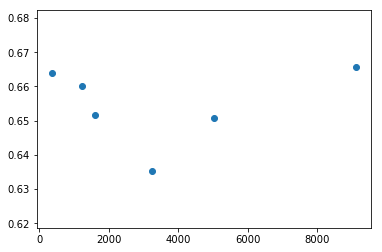

In [8]:
def P6():
        # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###

    # Initialize a CountVectorizer object and fit_transform to train data for non-processed and preprocessed data sets
    cv = CountVectorizer(train_data)
    vocab = cv.fit_transform(train_data)

    # Train logistic regression model with L1 regularization
    Log_model_L1 = LogisticRegression(penalty='l1', C=0.5)
    Log_model_L1.fit(vocab, train_labels)
    # Get weights for each feature
    log_weights_L1 = Log_model_L1.coef_

    # Train logistic regression model with L2 regularization
    Log_model_L2 = LogisticRegression(penalty='l2', C=0.5)
    Log_model_L2.fit(vocab, train_labels)
    # Get weights for each feature
    log_weights_L2 = Log_model_L2.coef_

    # Compare number of non-zero weights between L1 and L2
    nnz_count_L1 = np.count_nonzero(log_weights_L1)
    nnz_count_L2 = np.count_nonzero(log_weights_L2)
    print('L1 regularization model contains ', nnz_count_L1, ' non-zero learned weights.')
    print('This is ', nnz_count_L2 - nnz_count_L1, ' fewer than L2 model.' )

    # Reduce vocabulary by only keeping features that have at least one non-zero weight for L2
    # Try this for different values of C and save the accuracies and vocab sizes of each model
    acc_c = []
    vocab_size_c = []

    for c_val in [0.1, 0.5, 1.0, 10, 50, 1000]:

        # Train initial logistic regression model with L1 regularization and current value of C
        Log_model_c = LogisticRegression(penalty='l1', C=c_val)
        Log_model_c.fit(vocab, train_labels)

        # Get weights for each feature
        log_weights_c = Log_model_c.coef_

        # Get the unique column indices on non-zero weighted features
        nnz_c = np.nonzero(log_weights_c)[1]
        vocab_nnz_c = vocab[:,nnz_c]

        # Re-train model using vocab_nnz_c with L2 penalty
        Log_model_cl2 = LogisticRegression(penalty='l2', C=c_val) 
        Log_model_cl2.fit(vocab_nnz_c, train_labels)

        # Transform dev data
        vocab_dev = cv.transform(dev_data)
        vocab_dev_c = vocab_dev[:,nnz_c]

        # Get prediction accuracy
        acc = metrics.f1_score(dev_labels, Log_model_cl2.predict(vocab_dev_c), average='macro')

        # Add accuracy score and vocab size to corresponding lists
        acc_c.append(acc)
        vocab_size_c.append(np.count_nonzero(log_weights_c))

    # Create scatterplot of accuracy vs. vocab size
    plt.scatter(vocab_size_c, acc_c)
    plt.show()

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [9]:
def P7():
### STUDENT START ###
    # Fit and transform the train and dev data using TfidfVectorizer
    tv = TfidfVectorizer(train_data)
    vocab_tv = tv.fit_transform(train_data)
    vocab_dev = tv.transform(dev_data)

    # Create model and predict on dev data
    Log_model_tfidf = LogisticRegression(C=100)
    Log_model_tfidf.fit(vocab_tv, train_labels)
    predict = Log_model_tfidf.predict(vocab_dev)

    # Get prediction probabilities for each sample
    predict_prob = Log_model_tfidf.predict_proba(vocab_dev)
    # Get the max probability for each sample
    max_predict_prob = np.amax(predict_prob, axis=1)
    # Choose the probability for the correct class
    correct_predict_prob = np.empty((predict_prob.shape[0]))
    for i in range(0, predict_prob.shape[0]):
        correct_predict_prob[i]=predict_prob[i,dev_labels[i]]

    # Calculate an array of R by dividing max probability by correct probability
    R = np.divide(max_predict_prob, correct_predict_prob)

    # Print top 3 samples with highest values of R
    for sample in np.argpartition(R, -3)[-3:]:
        print('\n Sample: \n', dev_data[sample])

### STUDENT END ###
P7()


 Sample: 
 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


 Sample: 
 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

 Sample: 
 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make

ANSWER: 
The tf-idf vectorizer performs the same first step as the CountVectorizer (converts raw data to a vocabulary set), but uses a combination of term frequency and inverse document frequency to weight each feature. Tf-idf assigns a heavier weight to features that appear frequently within one sample but not frequently in the entire sample space. This helps to weed out stop-words.

These three samples show that the model doesn't assign appropriately high probabilities to certain relevant keywords. For example, the model doesn't realize that the word "Mormon" should have a high probability of being labeled as "Religion." The third example contains several instances of the word "Mormon" but is combined with punctuation, so the model thinks it is an entirely new word. Some fixes would be to remove punctuation in the preprocessor or to manually assign a probability to keywords that are not being approriately represented.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance